In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

In [2]:
%matplotlib inline

In [3]:
ny_taxi_data=pd.read_csv('nyc_taxi_trip_duration.csv')

In [4]:
ny_taxi_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
ny_taxi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  729322 non-null  object 
 1   vendor_id           729322 non-null  int64  
 2   pickup_datetime     729322 non-null  object 
 3   dropoff_datetime    729322 non-null  object 
 4   passenger_count     729322 non-null  int64  
 5   pickup_longitude    729322 non-null  float64
 6   pickup_latitude     729322 non-null  float64
 7   dropoff_longitude   729322 non-null  float64
 8   dropoff_latitude    729322 non-null  float64
 9   store_and_fwd_flag  729322 non-null  object 
 10  trip_duration       729322 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [6]:
ny_taxi_data.shape

(729322, 11)

In [7]:
ny_taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [8]:
ny_taxi_data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [9]:
#seggregating the date  according the datatype
ny_taxi_data['pickup_datetime']=pd.to_datetime(ny_taxi_data['pickup_datetime'])
ny_taxi_data['dropoff_datetime']=pd.to_datetime(ny_taxi_data['dropoff_datetime'])

In [10]:
#Derive month, day and hour from pickup and drop datetime to find out more insignt at granual level 
ny_taxi_data['pickup_month']=ny_taxi_data['pickup_datetime'].dt.month
ny_taxi_data['pickup_days']=ny_taxi_data['pickup_datetime'].dt.weekday
ny_taxi_data['pickup_hours']=ny_taxi_data['pickup_datetime'].dt.hour
ny_taxi_data['dropoff_month']=ny_taxi_data['dropoff_datetime'].dt.month
ny_taxi_data['dropoff_days']=ny_taxi_data['dropoff_datetime'].dt.weekday
ny_taxi_data['dropoff_hours']=ny_taxi_data['dropoff_datetime'].dt.hour

In [11]:
ny_taxi_data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_days,pickup_hours,dropoff_month,dropoff_days,dropoff_hours
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.00000
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,3.518410,3.049081,13.611698,3.518764,3.053015,13.60616
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,1.680661,1.954470,6.402853,1.680815,1.956866,6.48637
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,2.000000,1.000000,9.000000,2.000000,1.000000,9.00000
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,4.000000,3.000000,14.000000,4.000000,3.000000,14.00000
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,5.000000,5.000000,19.000000,5.000000,5.000000,19.00000
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,6.000000,6.000000,23.000000,7.000000,6.000000,23.00000


In [12]:
#Lets try to find out mean and standard deviation of trip duration and keep trip durration on to 2nd deviation(95% accuracy)

mean=ny_taxi_data['trip_duration'].mean()
std_dev=ny_taxi_data['trip_duration'].std()
ny_taxi_data=ny_taxi_data[ny_taxi_data['trip_duration']<= mean + 2*std_dev]
ny_taxi_data=ny_taxi_data[ny_taxi_data['trip_duration']>= mean - 2*std_dev]


In [13]:
ny_taxi_data.shape

(728274, 17)

Now lets keep the analysis restrict to NYC city and hence we need to control our pick up and drop off longitute and latitue with 
the NY geographic .
NY gepgraphic limits to below longitute and latitude
 - longitue = (-74.03, -73.75)
 - latitute= (40.63, 40.85)


In [14]:
ny_taxi_data=ny_taxi_data[ny_taxi_data['pickup_longitude'] <= -73.75]
ny_taxi_data=ny_taxi_data[ny_taxi_data['pickup_longitude'] >= -74.05]
ny_taxi_data=ny_taxi_data[ny_taxi_data['pickup_latitude']<= 40.85]
ny_taxi_data=ny_taxi_data[ny_taxi_data['pickup_latitude'] >= 40.63]
ny_taxi_data = ny_taxi_data[ny_taxi_data['dropoff_longitude'] <= -73.75]
ny_taxi_data = ny_taxi_data[ny_taxi_data['dropoff_longitude'] >= -74.03]
ny_taxi_data = ny_taxi_data[ny_taxi_data['dropoff_latitude'] <= 40.85]
ny_taxi_data = ny_taxi_data[ny_taxi_data['dropoff_latitude'] >= 40.63]

In [15]:
!pip install haversine

In [16]:
import haversine
from haversine import haversine

In [17]:
#Now calculate the distance between pickup and dropoff co-ordinates using harersine formula
def calc_dist(ny_taxi_data):
    pickup = (ny_taxi_data['pickup_latitude'],ny_taxi_data['pickup_longitude'])
    dropoff = (ny_taxi_data['dropoff_latitude'],ny_taxi_data['pickup_longitude'])
    return haversine(pickup,dropoff)
if 'distance' not in ny_taxi_data.columns:
    ny_taxi_data['distance'] = ny_taxi_data.apply(lambda x: calc_dist(x), axis = 1)

In [18]:
#find out the speed

if 'speed' not in ny_taxi_data.columns:
    ny_taxi_data['speed']=(ny_taxi_data.distance/(ny_taxi_data.trip_duration/3600))

In [19]:
ny_taxi_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,pickup_days,pickup_hours,dropoff_month,dropoff_days,dropoff_hours,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,2,0,16,2,0,16,0.857259,7.715329
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,3,4,23,3,4,23,4.093294,13.396236
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,2,6,17,2,6,18,5.944396,13.088579
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,1,1,9,1,1,10,2.324906,7.335375
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,2,2,6,2,2,6,3.576224,15.182084


visulaisation of data after doing some basic clean on all the attibutes

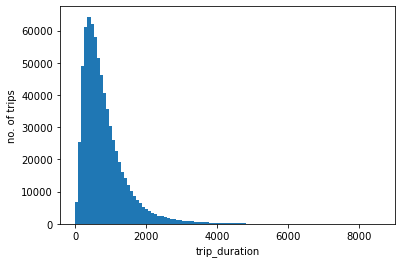

In [20]:
plt.hist(ny_taxi_data['trip_duration'].values,bins=100)
plt.xlabel('trip_duration')
plt.ylabel('no. of trips')
plt.show()

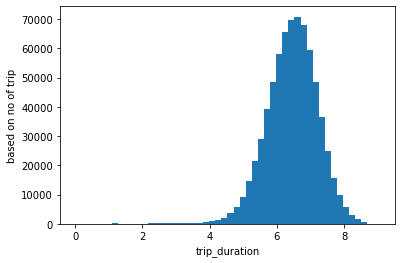

/Users/728389/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='log_trip_duration', ylabel='Density'>

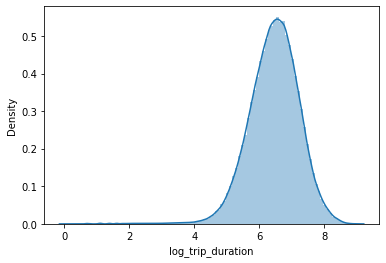

In [21]:
ny_taxi_data['log_trip_duration'] = np.log(ny_taxi_data['trip_duration'].values )
plt.hist(ny_taxi_data['log_trip_duration'].values, bins=50)
plt.xlabel('trip_duration')
plt.ylabel('based on no of trip')
plt.show()
sns.distplot(ny_taxi_data["log_trip_duration"], bins =100)

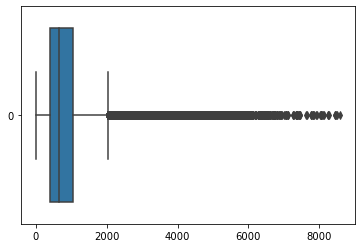

In [23]:
#box plot for outliers
sns.boxplot(data=ny_taxi_data['trip_duration'], orient='horizontal')
plt.show()

In [24]:
#Removing outliers above 2 hours trips 
ny_taxi_data=ny_taxi_data[ny_taxi_data.trip_duration>=60] 
ny_taxi_data=ny_taxi_data[ny_taxi_data.trip_duration<=7200] 

There are nothing much difference between pick and drop off month
lets visualise day wise 

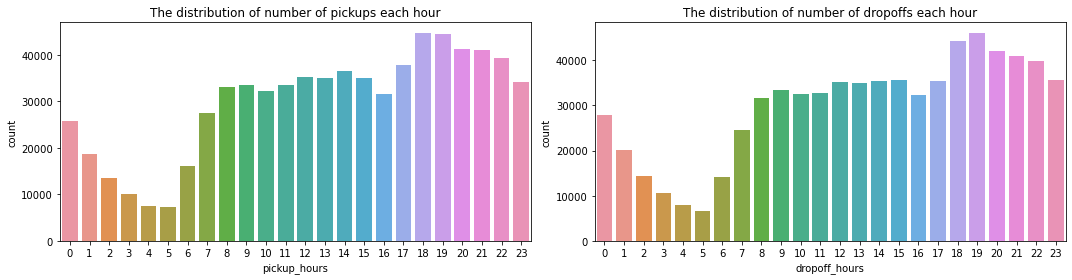

In [25]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,4))
sns.countplot(x='pickup_hours',data=ny_taxi_data,ax=ax[0])
ax[0].set_title('The distribution of number of pickups each hour')
sns.countplot(x='dropoff_hours',data=ny_taxi_data,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs each hour')
plt.tight_layout()

Based on above graph majority of trips are happening from 6 PM to 10 PM and then gradually decreasing , lets do some featue
extraction from this hrs data

In [26]:
# Creating a new col rush hrs for pick up and dropp off
def rush_hours(hours):
    if hours.item()>=7 and hours.item()<=9:
         return 'rush_hours_morning(7-9)'
    elif hours.item()>=9 and hours.item()<=16:
         return 'normal_hours(9-16)'
    elif hours.item()>=16 and hours.item()<=22:
         return 'rush_hours_evening(16-22)'
    else:
        return 'late_night_hrs'
    
ny_taxi_data['traffic_during_pickup']=ny_taxi_data[['pickup_hours']].apply(rush_hours, axis=1)
ny_taxi_data['traffic_during_dropoff']=ny_taxi_data[['dropoff_hours']].apply(rush_hours, axis=1)

In [27]:
ny_taxi_data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_days,pickup_hours,dropoff_month,dropoff_days,dropoff_hours,distance,speed,log_trip_duration,traffic_during_pickup,traffic_during_dropoff
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,...,0,16,2,0,16,0.857259,7.715329,5.991465,normal_hours(9-16),normal_hours(9-16)
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,...,4,23,3,4,23,4.093294,13.396236,7.003065,late_night_hrs,late_night_hrs
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,...,6,17,2,6,18,5.944396,13.088579,7.399398,rush_hours_evening(16-22),rush_hours_evening(16-22)
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,...,1,9,1,1,10,2.324906,7.335375,7.039660,rush_hours_morning(7-9),normal_hours(9-16)
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,...,2,6,2,2,6,3.576224,15.182084,6.742881,late_night_hrs,late_night_hrs


In [28]:
ny_taxi_data['store_and_fwd_flag']=ny_taxi_data['store_and_fwd_flag'].map({'Y':1,'N' :0})

In [29]:
#Now apply one hot encoding to all the categorical attributes
taxi_vendor = pd.get_dummies(ny_taxi_data['vendor_id'],prefix='vendor',drop_first= True)
taxi_passanger=pd.get_dummies(ny_taxi_data['passenger_count'],prefix='passenger',drop_first= True)
taxi_store_and_fwd_flag=pd.get_dummies(ny_taxi_data['store_and_fwd_flag'], prefix='store_and_fwd_flag',drop_first= True)
taxi_pickup_day=pd.get_dummies(ny_taxi_data['pickup_days'], prefix='pickup_day',drop_first= True)
taxi_dropoff_day=pd.get_dummies(ny_taxi_data['dropoff_days'], prefix='dropoff_day',drop_first= True)
taxi_pickup_month=pd.get_dummies(ny_taxi_data['pickup_month'], prefix='pickup_month',drop_first= True)
taxi_dropoff_month=pd.get_dummies(ny_taxi_data['dropoff_month'], prefix='dropoff_month',drop_first= True)
taxi_pickup_traffic_scenerio=pd.get_dummies(ny_taxi_data['traffic_during_pickup'], prefix='pickup_',drop_first= True)
taxi_dropoff_traffic_scenerio=pd.get_dummies(ny_taxi_data['traffic_during_dropoff'], prefix='dropoff_',drop_first= True)
                          

In [30]:
ny_taxi_data_final=pd.concat([ny_taxi_data,taxi_passanger,taxi_vendor,taxi_store_and_fwd_flag,taxi_pickup_day,taxi_dropoff_day,taxi_pickup_month,taxi_dropoff_month,taxi_pickup_traffic_scenerio,taxi_dropoff_traffic_scenerio],axis=1)

In [31]:
ny_taxi_data_final.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7,pickup__normal_hours(9-16),pickup__rush_hours_evening(16-22),pickup__rush_hours_morning(7-9),dropoff__normal_hours(9-16),dropoff__rush_hours_evening(16-22),dropoff__rush_hours_morning(7-9)
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,0,...,0,0,0,0,1,0,0,1,0,0
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,0,...,0,0,0,0,0,0,0,0,0,0
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,0,...,0,0,0,0,0,1,0,0,1,0
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,0,...,0,0,0,0,0,0,1,1,0,0
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
ny_taxi_data_final.shape

(714608, 59)

In [31]:
ny_taxi_data_final.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_month,pickup_days,pickup_hours,...,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7,pickup__normal_hours(9-16),pickup__rush_hours_evening(16-22),pickup__rush_hours_morning(7-9),dropoff__normal_hours(9-16),dropoff__rush_hours_evening(16-22),dropoff__rush_hours_morning(7-9)
count,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,...,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000,714608.000000
mean,1.535384,1.662868,-73.973953,40.751073,-73.973679,40.751700,828.141787,3.517132,3.046675,13.626495,...,0.172174,0.170118,0.160864,0.000062,0.334749,0.348001,0.131545,0.334592,0.347644,0.125407
std,0.498747,1.313266,0.036902,0.027302,0.032322,0.029562,638.252706,1.680768,1.953836,6.380349,...,0.377532,0.375737,0.367406,0.007847,0.471903,0.476337,0.337996,0.471848,0.476223,0.331180
min,1.000000,0.000000,-74.040245,40.630432,-74.029999,40.630001,60.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,-73.991882,40.737499,-73.991287,40.736347,398.000000,2.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,-73.981804,40.754112,-73.979881,40.754532,659.000000,4.000000,3.000000,14.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,-73.967628,40.768291,-73.963593,40.769493,1060.000000,5.000000,5.000000,19.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,2.000000,6.000000,-73.754105,40.849991,-73.750122,40.849998,7123.000000,6.000000,6.000000,23.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
#get all the column naame
ny_taxi_data_final.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_month', 'pickup_days', 'pickup_hours',
       'dropoff_month', 'dropoff_days', 'dropoff_hours', 'distance', 'speed',
       'log_trip_duration', 'traffic_during_pickup', 'traffic_during_dropoff',
       'passenger_1', 'passenger_2', 'passenger_3', 'passenger_4',
       'passenger_5', 'passenger_6', 'vendor_2', 'store_and_fwd_flag_Y',
       'pickup_day_1', 'pickup_day_2', 'pickup_day_3', 'pickup_day_4',
       'pickup_day_5', 'pickup_day_6', 'dropoff_day_1', 'dropoff_day_2',
       'dropoff_day_3', 'dropoff_day_4', 'dropoff_day_5', 'dropoff_day_6',
       'pickup_month_2', 'pickup_month_3', 'pickup_month_4', 'pickup_month_5',
       'pickup_month_6', 'dropoff_month_2', 'dropoff_month_3',
       'dropoff_month_4', 'dropoff_month_5', 'dropoff_month_6',
       

In [33]:
ny_taxi_data_final=ny_taxi_data_final.drop(['id','vendor_id','pickup_datetime','store_and_fwd_flag','dropoff_datetime','passenger_count','pickup_longitude', 'pickup_latitude' ,'dropoff_longitude', 'dropoff_latitude','pickup_month','pickup_days','pickup_hours','dropoff_month','dropoff_days','dropoff_hours','log_trip_duration','traffic_during_pickup','traffic_during_dropoff'], axis=1)



In [34]:
#After dropping the notrequired columns ,shape is 
ny_taxi_data_final.shape

(714608, 40)

In [35]:
#Segregating variables: Independent and Dependent Variables
#Splitting the dateset to train , test to fit into the model
#Assigning X and y variables
X = ny_taxi_data_final.drop('trip_duration',1)
y = ny_taxi_data_final['trip_duration']

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=1)

In [37]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(571686, 39) (142922, 39) (571686,) (142922,)


Building perdication modeel

In [38]:
# liner Model
lR = LinearRegression()
lR.fit(X_train,y_train)
lR_pred = lR.predict(X_test)
print(lR_pred)

[ 548.62149726  510.14103024  972.26368308 ... 1016.38963715 1181.07456498
  720.17398243]


In [39]:
# Root MSE
lR_rmse = np.sqrt(metrics.mean_squared_error(lR_pred,y_test))
lR_rmse

348.43612687545897

In [40]:
#MAE
# Predicting over the Train Set and calculating error
train_predict = lR.predict(X_train)
k = mae(train_predict, y_train)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 214.56155124205225


In [41]:
# Predicting over the Train Set and calculating error
test_predict = lR.predict(X_test)
k = mae(test_predict, y_test)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 214.07323119258842


In [42]:
#MSE
train_predict = lR.predict(X_train)
k = mse(train_predict, y_train)
print('Training Mean Square Error', k )

Training Mean Square Error 123212.08224319686


In [43]:
test_predict = lR.predict(X_test)
k = mse(test_predict, y_test)
print('Training Mean square Error', k )

Training Mean square Error 121407.73451197094


In [44]:
#R2
lR_r2score = metrics.r2_score(lR_pred,y_test)
lR_r2score

0.5715308776016543

In [45]:
#Train Score
lR_train=lR.score(X_train,y_train)
lR_train

0.6977233397083135

In [46]:
#Test Score
lR_test=lR.score(X_test,y_test)
lR_test

0.7012414839316345

In [47]:
lR.coef_

array([ 252.25560016,  -54.49649778, -288.39267705, -279.59723176,
       -282.08689803, -280.26431529, -283.75756397, -284.98001731,
          3.2079549 ,   75.90218495,   80.09381079,  172.79064728,
        220.06163971,  195.15699613,   65.83792663,  -22.20590371,
        -56.57550647, -133.68876195, -177.66402564, -168.08208674,
        -80.81850842,    6.65794326,  189.33626326,   -8.06997675,
        -59.67290384,   38.20278249,   71.89879196, -192.56071905,
         14.7162843 ,   84.90509895,    7.06873855,  -22.0741585 ,
        176.53569297,  205.5101701 ,  -54.10195773,  256.43106335,
       -144.49467373,   64.57822253, -231.94662033])

<AxesSubplot:title={'center':'Model Coefficients'}>

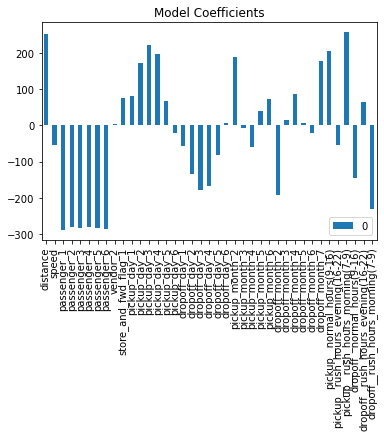

In [49]:
coefficent = pd.DataFrame(lR.coef_,index=X_train.columns)
coefficent.plot(kind='bar', title='Model Coefficients')

In [50]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head(10)

,fitted values,predicted values,residuals
505078,509,548.621497,-39.621497
701477,462,510.141030,-48.141030
498579,1005,972.263683,32.736317
384199,1003,983.767892,19.232108
212033,593,535.799995,57.200005
724824,933,877.501923,55.498077
414554,357,413.618231,-56.618231
72441,604,743.445460,-139.445460
495804,951,966.082290,-15.082290
286048,871,902.945521,-31.945521


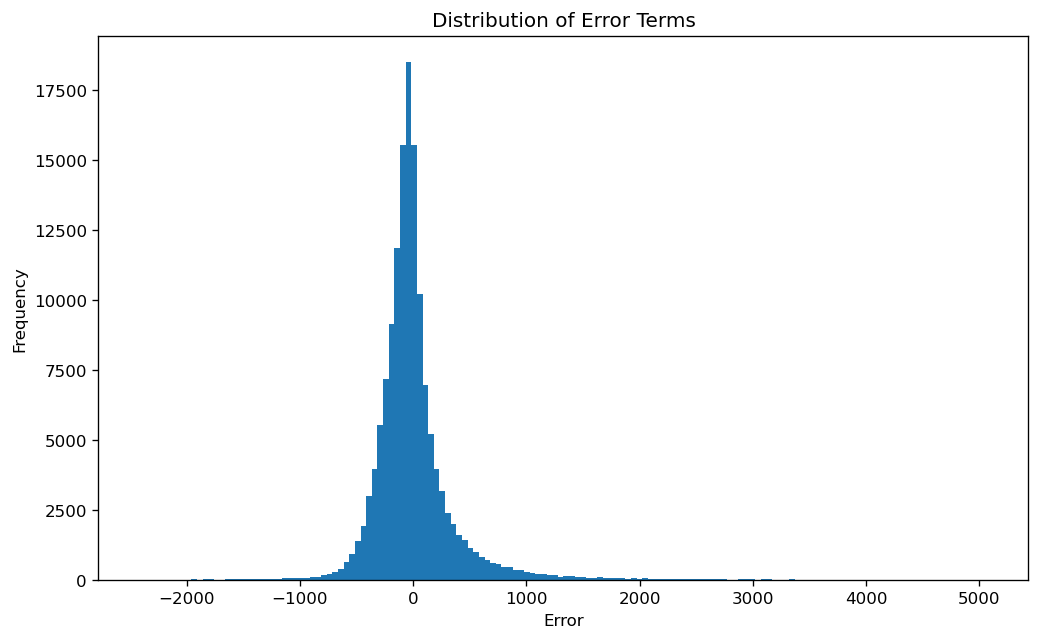

In [51]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

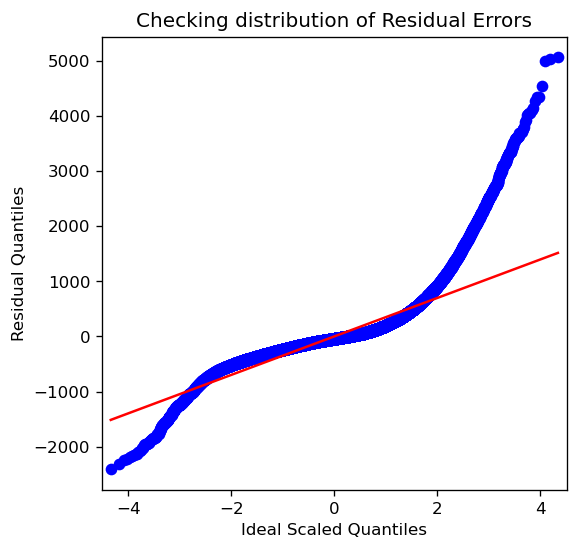

In [52]:
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

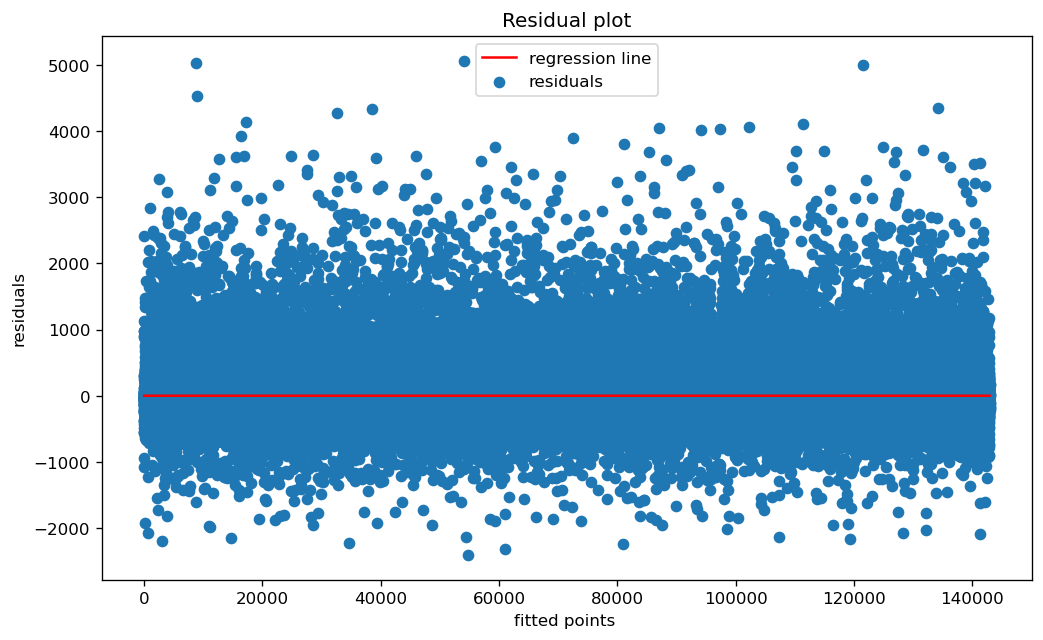

In [54]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
f = range(0,142922)
k = [0 for i in range(0,142922)]
plt.scatter( f, residuals['residuals'], label = 'residuals')
plt.plot( f, k , color = 'red', label = 'regression line' )
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.legend()

Here the distribution of the residuals is Homoscedastic. So the assumption of Linear Regression holds true.